In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [1]:
import warnings
warnings.filterwarnings("ignore","Mean of empty slice", RuntimeWarning)
warnings.filterwarnings("ignore","All-NaN slice encountered", RuntimeWarning)


In [2]:
import numpy as np
# import xarray as xr
# # import pickle
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/Users/ccamargo/Documents/github/SLB/")

from utils_SLB import unc_test, agree_test, zeta_test

In [3]:
#%%
path = '/Volumes/LaCie_NIOZ/data/budget/'
dic = pd.read_pickle(path+'budget.pkl')

key ='som' # cluster
mask = np.array(dic[key]['mask']) # clusters mask
n = dic[key]['n']
alt = np.array(dic['alt']['ts'])
comp = np.array(dic['sum']['ts'])

# Time series

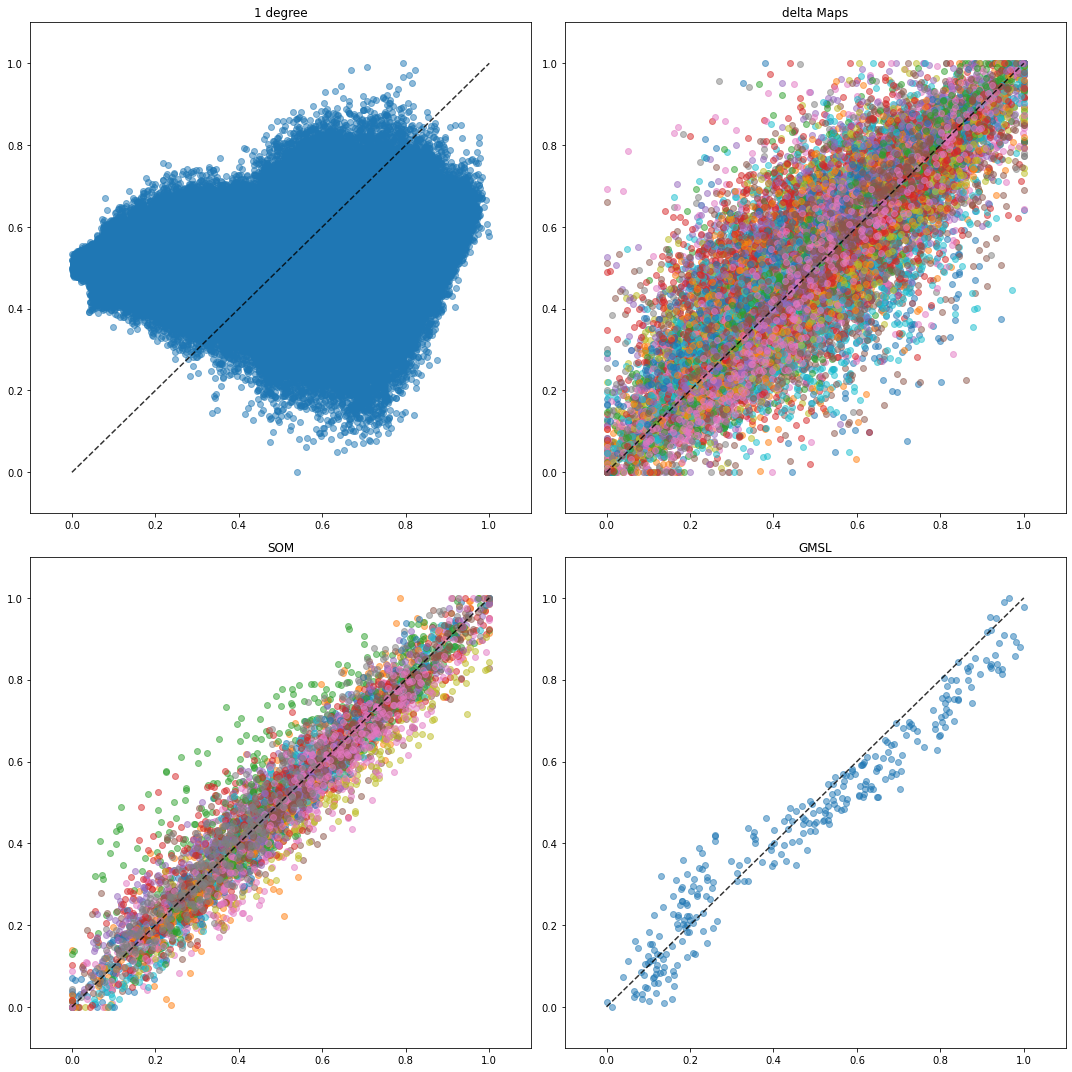

In [5]:
#%% scatter ts 
plt.figure(figsize=(15,15))
nrow=2
ncol=2

mask_tmp = np.array(mask)
mask_tmp[np.isfinite(mask_tmp)]=1

plt.subplot(nrow,ncol,1)
plt.title('1 degree')
y = np.array(dic['alt']['ts'] * mask_tmp).flatten()
x = np.array(dic['sum']['ts'] * mask_tmp).flatten() 
x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))
y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))

x = x[np.isfinite(y)]
y = y[np.isfinite(y)]
y = y[np.isfinite(x)]
x = x[np.isfinite(x)]
plt.scatter(x,y,alpha=0.5)
plt.plot([0, 1], [0, 1], ls="--", c="black",alpha=0.8)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

##
plt.subplot(nrow,ncol,4)
plt.title('GMSL')
y = np.nanmean(np.array(dic['alt']['ts']) *mask_tmp,axis=(1,2)) 
x = np.nanmean(np.array(dic['sum']['ts']) *mask_tmp,axis=(1,2)) 
x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))
y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))

x = x[np.isfinite(y)]
y = y[np.isfinite(y)]
y = y[np.isfinite(x)]
x = x[np.isfinite(x)]
plt.scatter(x,y,alpha=0.5)

plt.plot([0, 1], [0, 1], ls="--", c="black",alpha=0.8)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

##
plt.subplot(nrow,ncol,3)
plt.title('SOM')
for i in range(n): 
    icluster = int(i+1)
    mask_tmp = np.array(mask)
    mask_tmp[np.where(mask_tmp!=icluster)] = np.nan
    mask_tmp[np.isfinite(mask_tmp)]= 1
    
    y = np.nanmean(alt*mask_tmp,axis=(1,2)) 
    y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))
    x = np.nanmean(comp*mask_tmp,axis=(1,2)) #- np.nanmean(comp*mask_tmp)
    x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))

    x = x[np.isfinite(y)]
    y = y[np.isfinite(y)]
    y = y[np.isfinite(x)]
    x = x[np.isfinite(x)]

    plt.scatter(x,y,alpha=0.5)

plt.plot([0, 1], [0, 1], ls="--", c="black",alpha=0.8)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

##
plt.subplot(nrow,ncol,2)
plt.title('delta Maps')
for i in range(dic['dmap']['n']): 
    icluster = int(i+1)
    mask_tmp = np.array(dic['dmap']['mask'])
    mask_tmp[np.where(mask_tmp!=icluster)] = np.nan
    mask_tmp[np.isfinite(mask_tmp)]= 1
    
    y = np.nanmean(alt*mask_tmp,axis=(1,2)) 
    y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))
    x = np.nanmean(comp*mask_tmp,axis=(1,2)) #- np.nanmean(comp*mask_tmp)
    x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))

    x = x[np.isfinite(y)]
    y = y[np.isfinite(y)]
    y = y[np.isfinite(x)]
    x = x[np.isfinite(x)]

    plt.scatter(x,y,alpha=0.5)
plt.plot([0, 1], [0, 1], ls="--", c="black",alpha=0.8)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

plt.tight_layout()
plt.show()

# Trends

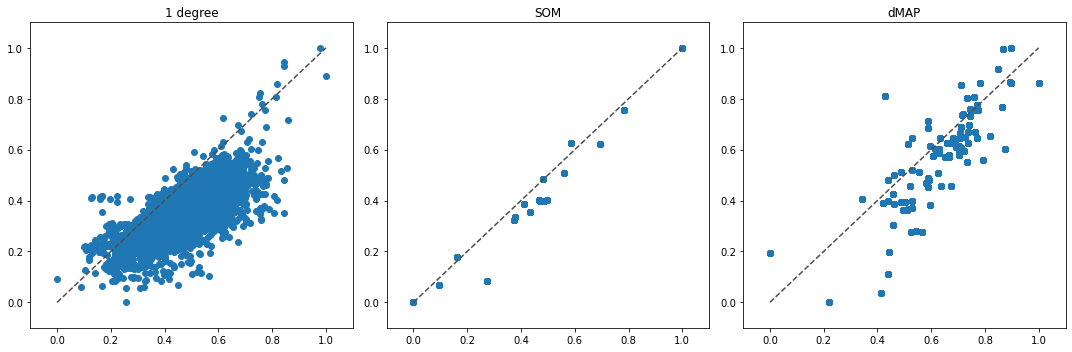

In [6]:
#%% scatter trend
plt.figure(figsize=(15,5))
nrow=1
ncol=3

mask_tmp = np.array(mask)
mask_tmp[np.isfinite(mask_tmp)]=1

plt.subplot(nrow,ncol,1)
plt.title('1 degree')
y = np.array(dic['alt']['trend'] * mask_tmp).flatten() 
x = np.array(dic['sum']['trend'] * mask_tmp).flatten()
x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))
y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))

x = x[np.isfinite(y)]
y = y[np.isfinite(y)]
y = y[np.isfinite(x)]
x = x[np.isfinite(x)]

plt.scatter(x,y)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.plot([0, 1], [0, 1], ls="--", c=".3")

plt.subplot(nrow,ncol,3)
plt.title('SOM')
y = np.array(dic['som']['alt']['trend']).flatten()
x = np.array(dic['som']['sum']['trend']).flatten()
x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))
y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))

x = x[np.isfinite(y)]
y = y[np.isfinite(y)]
y = y[np.isfinite(x)]
x = x[np.isfinite(x)]

plt.scatter(x,y)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.plot([0, 1], [0, 1], ls="--", c=".3")

ax = plt.subplot(nrow,ncol,2)
plt.title('dMAP')
y = np.array(dic['dmap']['alt']['trend']).flatten()
x = np.array(dic['dmap']['sum']['trend']).flatten()

# y = np.array(dic['dmap']['df']['alt_tr'])
# x = np.array(dic['dmap']['df']['sum_tr'])

x = x[np.isfinite(y)]
y = y[np.isfinite(y)]

y = y[np.isfinite(x)]
x = x[np.isfinite(x)]

x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))
y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))
plt.scatter(x,y)
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

plt.tight_layout()
plt.show()

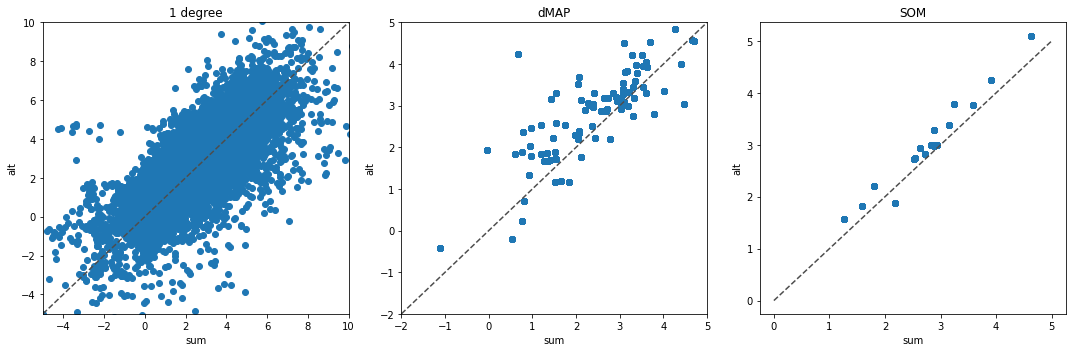

In [17]:
#%% scatter trend
plt.figure(figsize=(15,5))
nrow=1
ncol=3

mask_tmp = np.array(mask)
mask_tmp[np.isfinite(mask_tmp)]=1

plt.subplot(nrow,ncol,1)
plt.title('1 degree')
y = np.array(dic['alt']['trend'] * mask_tmp).flatten() 
x = np.array(dic['sum']['trend'] * mask_tmp).flatten()
# x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))
# y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))

x = x[np.isfinite(y)]
y = y[np.isfinite(y)]
y = y[np.isfinite(x)]
x = x[np.isfinite(x)]


plt.scatter(x,y)
plt.xlim([-5,10])
plt.ylim([-5,10])
plt.plot([-5, 10], [-5, 10], ls="--", c=".3")
plt.xlabel('sum')
plt.ylabel('alt')

plt.subplot(nrow,ncol,3)
plt.title('SOM')
y = np.array(dic['som']['alt']['trend']).flatten()
x = np.array(dic['som']['sum']['trend']).flatten()
# x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))
# y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))

x = x[np.isfinite(y)]
y = y[np.isfinite(y)]
y = y[np.isfinite(x)]
x = x[np.isfinite(x)]


plt.scatter(x,y)
# plt.xlim([-0.1,1.1])
# plt.ylim([-0.1,1.1])
plt.plot([0, 5], [0, 5], ls="--", c=".3")
plt.xlabel('sum')
plt.ylabel('alt')

ax = plt.subplot(nrow,ncol,2)
plt.title('dMAP')
y = np.array(dic['dmap']['alt']['trend']).flatten()
x = np.array(dic['dmap']['sum']['trend']).flatten()

# x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))
# y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))

x = x[np.isfinite(y)]
y = y[np.isfinite(y)]
y = y[np.isfinite(x)]
x = x[np.isfinite(x)]


plt.scatter(x,y)
plt.xlim([-2,5])
plt.ylim([-2,5])
plt.plot([-2, 5], [-2, 5], ls="--", c=".3")
plt.xlabel('sum')
plt.ylabel('alt')

plt.tight_layout()
plt.show()

In [4]:
y = np.array(dic['som']['alt']['trend']).flatten()
x = np.array(dic['som']['sum']['trend']).flatten()
print(y-x)

[nan nan nan ... nan nan nan]


In [8]:
df = dic['som']['df']


,cluster_n,alt_tr,alt_unc,steric_tr,steric_unc,barystatic_tr,barystatic_unc,dynamic_tr,dynamic_unc,sum_tr,sum_unc,res_tr,res_unc
0,1.0,2.718132,1.369442,0.217743,1.026620,1.216848,0.446488,1.091452,0.351508,2.519334,1.211397,0.183561,0.888898
1,2.0,3.287504,0.895027,1.080299,0.682582,1.241344,0.442594,0.561204,0.273272,2.882276,0.889896,0.408513,0.610063
2,3.0,3.774968,1.066866,2.000761,0.507510,1.186072,0.413048,0.399667,0.503169,3.587932,0.865232,0.223036,0.812345
3,4.0,2.981101,0.693709,1.375926,0.498407,1.256592,0.440296,0.260484,0.274131,2.890468,0.740923,0.089194,0.591978
4,5.0,2.822914,0.370274,1.252811,0.354581,1.296409,0.436690,0.173942,0.143356,2.723162,0.594432,0.099752,0.463194
5,6.0,3.000554,0.596174,1.316915,0.511602,1.247697,0.429623,0.304712,0.232264,2.835219,0.724914,0.148933,0.579899
6,7.0,3.372032,0.879136,1.958097,0.721914,1.258441,0.421040,-0.014875,0.230752,3.144044,0.887923,0.248264,0.591888
7,8.0,2.988031,0.574648,1.269410,0.375379,0.998461,0.441890,0.508189,0.272699,2.842255,0.667339,0.178835,0.499446
8,9.0,1.877481,1.234647,0.813387,1.072248,0.855273,0.460938,0.498735,0.216027,2.185566,1.214002,-0.316934,0.757496
9,10.0,4.246285,1.185678,2.729826,0.863512,1.157220,0.416587,0.018608,0.243666,3.899241,1.023192,0.356044,0.740240


Text(0, 0.5, 'alt')

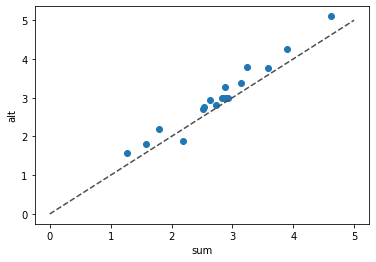

In [12]:
y = np.array(df['alt_tr']).flatten()
x = np.array(df['sum_tr']).flatten()
# x  = np.array(x - np.nanmin(x))/ (np.nanmax(x) - np.nanmin(x))
# y  = np.array(y - np.nanmin(y))/ (np.nanmax(y) - np.nanmin(y))

x = x[np.isfinite(y)]
y = y[np.isfinite(y)]
y = y[np.isfinite(x)]
x = x[np.isfinite(x)]

plt.figure()
plt.scatter(x,y)
# plt.xlim([-0.1,1.1])
# plt.ylim([-0.1,1.1])
plt.plot([0, 5], [0, 5], ls="--", c=".3")
plt.xlabel('sum')
plt.ylabel('alt')